In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (10,7)
import numpy as np

# Szimulált adatok

In [2]:
# mintavétel 
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# tanuló és treszt adatokra vágás
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2)

# Logisztik regreszios model

The logistic regresion model can be used for ROC 

In [3]:
# model illesztése
model = LogisticRegression()
model.fit(train_X, train_y)
probs_y = model.predict_proba(test_X)
# csak a +  osztály értékeit hagyuk meg
probs_y = probs_y[:, 1] 

# Igazságmátrix

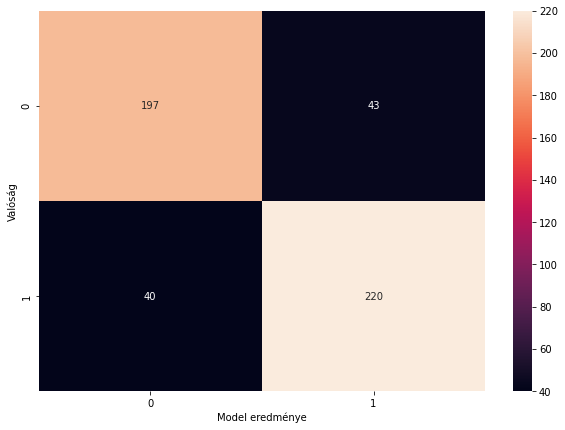

In [4]:
import seaborn as sn
import pandas as pd
cutoff = 0.5
probs_y_binary = [ 0 if x < cutoff else 1 for x in probs_y ]

data = {'y_Actual':    test_y,
        'y_Predicted': probs_y_binary
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Valóság'], colnames=['Model eredménye'])

sn.heatmap(confusion_matrix, annot=True,  fmt="d")
plt.show()

# ROC

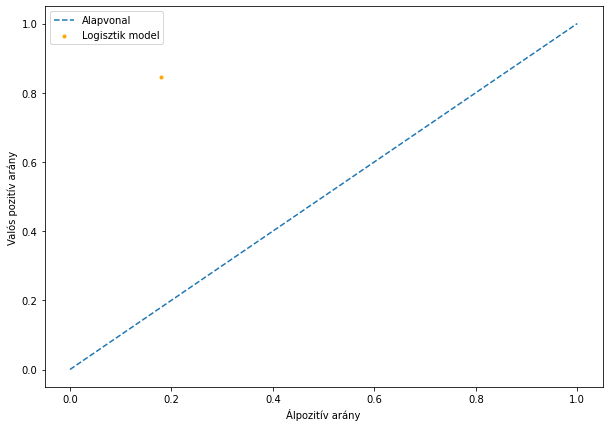

In [5]:
tpr = 220/(40+220)
fpr = 43/(43+197)
# Alapvonal
plt.plot( np.linspace(0,1,100), np.linspace(0,1,100), linestyle='--', label='Alapvonal')
# logistic regresion model
plt.scatter(fpr, tpr, marker='.', label='Logisztik model', color="orange")
# tengelyek címkézése
plt.xlabel('Álpozitív arány')
plt.ylabel('Valós pozitív arány')
plt.legend()
plt.show()

In [6]:
# ROC számítása
fpr, tpr, cutoff = roc_curve(test_y, probs_y)

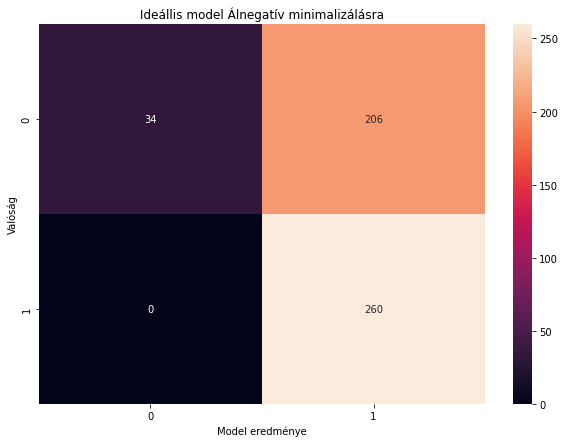

In [7]:
# megkeressük a legkisebb álpozitív értékű pontot ahol a Valós pozitív == 1 
index = np.where(tpr == 1)[0][0]
cutoff_alneg = cutoff[index]
# igazságmátrix
probs_y_binary = [ 0 if x < cutoff_alneg else 1 for x in probs_y ]

data = {'y_Actual':    test_y,
        'y_Predicted': probs_y_binary
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Valóság'], colnames=['Model eredménye'])

sn.heatmap(confusion_matrix, annot=True,  fmt="d")
plt.title(f"Ideállis model Álnegatív minimalizálásra")
plt.show()

Ideállis pontosság 0.48979604275422095


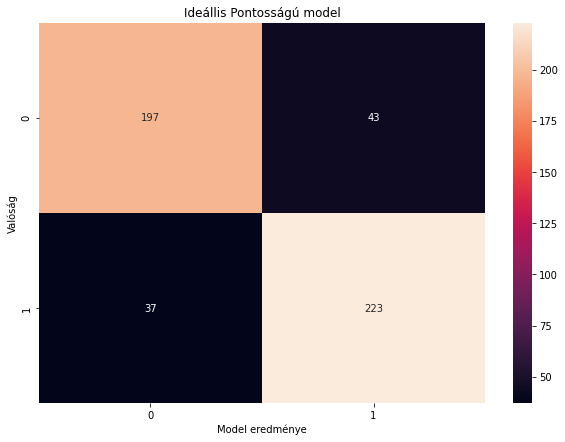

In [8]:

index = np.where(tpr-fpr == np.max(tpr-fpr))
cutoff_pont = cutoff[index][0]
print("Ideállis pontosság", cutoff_pont)
# igazságmátrix
probs_y_binary = [ 0 if x < cutoff_pont else 1 for x in probs_y ]

data = {'y_Actual':    test_y,
        'y_Predicted': probs_y_binary
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Valóság'], colnames=['Model eredménye'])

sn.heatmap(confusion_matrix, annot=True,  fmt="d")
plt.title(f"Ideállis Pontosságú model")
plt.show()

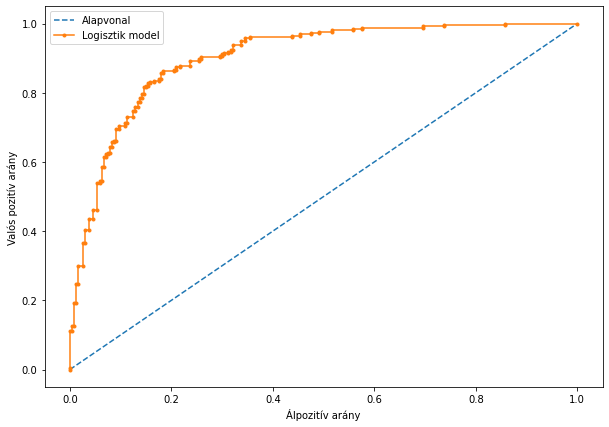

In [9]:
# Alapvonal
plt.plot( np.linspace(0,1,100), np.linspace(0,1,100), linestyle='--', label='Alapvonal')
# logistic regresion model
plt.plot(fpr, tpr, marker='.', label='Logisztik model')
# tengelyek címkézése
plt.xlabel('Álpozitív arány')
plt.ylabel('Valós pozitív arány')
plt.legend()
plt.show()

## AUC

In [10]:
auc = roc_auc_score(test_y, probs_y)
print('AUC: %.3f' % auc)

AUC: 0.903


## Precision - Recall

In [11]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(test_y, probs_y)

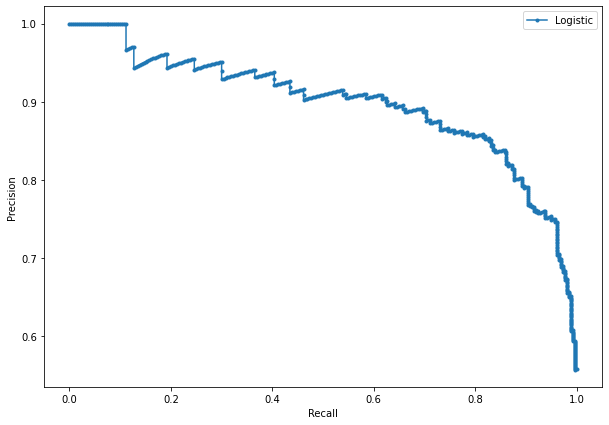

In [12]:
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## ROC on unbalanced dataset

In [13]:
X_ub, y_ub = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)
# split into train/test sets
train_X_ub, test_X_ub, train_y_ub, test_y_ub = train_test_split(X_ub, y_ub, test_size=0.5, random_state=2)

In [14]:
# fit a model
model_ub = LogisticRegression()
model_ub.fit(train_X_ub, train_y_ub)# predict probabilities
probs_y_ub = model_ub.predict_proba(test_X_ub)
# csak a +  osztály értékeit hagyuk meg
probs_y_ub = probs_y_ub[:, 1] 

In [15]:
# ROC számítása
fpr_ub, tpr_ub, cutoff_ub = roc_curve(test_y_ub, probs_y_ub)

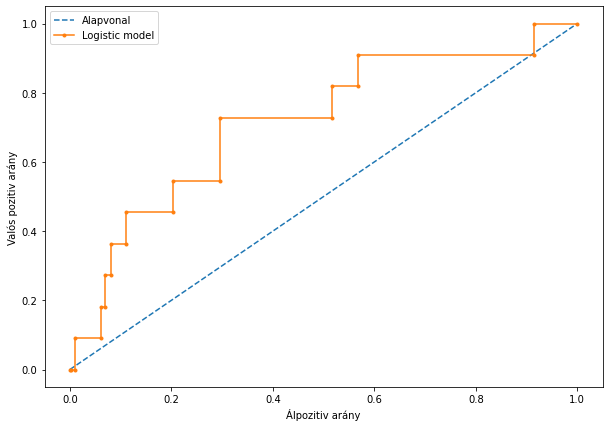

In [16]:
# Alapvonal
plt.plot( np.linspace(0,1,100), np.linspace(0,1,100), linestyle='--', label='Alapvonal')
# logistic regresion model
plt.plot(fpr_ub, tpr_ub, marker='.', label='Logistic model')
# tengelyek címkézése
plt.xlabel('Álpozitiv arány')
plt.ylabel('Valós pozitiv arány')
plt.legend()
plt.show()

In [17]:
auc_ub = roc_auc_score(test_y_ub, probs_y_ub)
print('AUC: %.3f' % auc_ub)

AUC: 0.716


In [18]:
precision_ub, recall_ub, thresholds_ub = precision_recall_curve(test_y_ub, probs_y_ub)

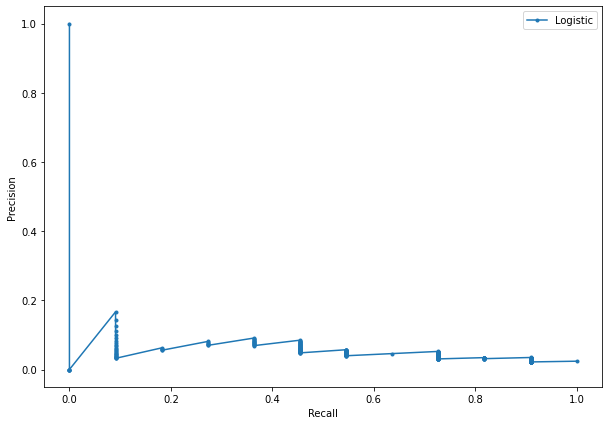

In [19]:
plt.plot(recall_ub, precision_ub, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()